In [14]:
import numpy as np 
import pandas as pd
import matplotlib as plt
from matplotlib.figure import Figure
from matplotlib import *
import sys
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import pylab as pl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from numpy import set_printoptions
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import precision_score
import warnings
warnings.simplefilter('ignore')

In [15]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
#LOAD THE  DATASET

In [17]:
df = pd.read_csv("/content/diabeties.csv")

In [18]:
#Head of the dataset. This basically gives information on the first five rows by default unless it is specified

In [19]:
#display first five rows of the data
df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
5,0,1,1,1,25,1,0,0,1,1,...,1,0,2,0,2,0,1,10,6,8
6,0,1,0,1,30,1,0,0,0,0,...,1,0,3,0,14,0,0,9,6,7
7,0,1,1,1,25,1,0,0,1,0,...,1,0,3,0,0,1,0,11,4,4
8,2,1,1,1,30,1,0,1,0,1,...,1,0,5,30,30,1,0,9,5,1
9,0,0,0,1,24,0,0,0,0,0,...,1,0,2,0,0,0,1,8,4,3


In [20]:
#displays last five rows of data
df.tail(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253670,2,1,1,1,25,0,0,1,0,1,...,1,0,5,15,0,1,0,13,6,4
253671,0,1,1,1,23,0,1,1,0,0,...,1,1,4,0,5,0,1,8,3,2
253672,0,1,0,1,30,1,0,1,1,1,...,1,0,3,0,0,0,1,12,2,1
253673,0,1,0,1,42,0,0,0,1,1,...,1,0,3,14,4,0,1,3,6,8
253674,0,0,0,1,27,0,0,0,0,0,...,1,0,1,0,0,0,0,3,6,5
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,2,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1
253679,2,1,1,1,25,0,0,1,1,1,...,1,0,2,0,0,0,0,9,6,2


In [21]:
#dispays the shape of the dataset. technically the total number of rows and colums in the dataset
df.shape

(253680, 22)

In [22]:
#to get the list of types of all the columns 
df.dtypes

Diabetes_012            int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

In [23]:
#to check Information about the data and the data types of each respective attribute.
#Bascally finding out if the dateset has any null value.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [24]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [25]:
#Before dropping duplicates we have to check the shape first to determine if truly duplicates were removed.

In [26]:
df.shape

(253680, 22)

In [27]:
df= df.drop_duplicates()

In [28]:
df.shape

(229781, 22)

In [29]:
#to see what Null values present in every column in the dataset

In [30]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [31]:
df.isnull().any()

Diabetes_012            False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

In [32]:
#Found zero values in dataset
# replacing zero values with the mean of the column
df['Smoker'] = df['Smoker'].replace(0,df['Smoker'].mean())
df['Stroke'] = df['Stroke'].replace(0,df['Stroke'].mean())
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].replace(0,df['HeartDiseaseorAttack'].mean())
df['Fruits'] = df['Fruits'].replace(0,df['Fruits'].mean())
df['AnyHealthcare'] = df['AnyHealthcare'].replace(0,df['AnyHealthcare'].mean())
df['PhysActivity'] = df['PhysActivity'].replace(0,df['PhysActivity'].mean())
df['GenHlth'] = df['GenHlth'].replace(0,df['GenHlth'].mean())
df['MentHlth'] = df['MentHlth'].replace(0,df['MentHlth'].mean())
df['Age'] = df['Age'].replace(0,df['Age'].mean())
df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].replace(0,df['HvyAlcoholConsump'].mean())
df['Veggies'] = df['Veggies'].replace(0,df['Veggies'].mean())
df['PhysHlth'] = df['PhysHlth'].replace(0,df['PhysHlth'].mean())
df['DiffWalk'] = df['DiffWalk'].replace(0,df['DiffWalk'].mean())
df['Sex'] = df['Sex'].replace(0,df['Sex'].mean())
df['Education'] = df['Education'].replace(0,df['Education'].mean())
df['Income'] = df['Income'].replace(0,df['Income'].mean())
df['NoDocbcCost'] = df['NoDocbcCost'].replace(0,df['NoDocbcCost'].mean())

In [33]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,...,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.325627,0.454441,0.441760,0.959535,28.68567,0.714482,0.087508,0.195778,0.928900,0.850205,...,0.997092,0.177007,2.601151,5.833678,7.460109,0.336601,0.685538,8.086582,4.980568,5.890383
std,0.724623,0.497921,0.496598,0.197047,6.78636,0.266539,0.197513,0.272839,0.117912,0.188514,...,0.012180,0.263236,1.064685,6.776349,7.814372,0.316601,0.278306,3.093809,0.992895,2.092477
min,0.000000,0.000000,0.000000,0.000000,12.00000,0.465661,0.044756,0.103216,0.733355,0.612966,...,0.946075,0.092810,1.000000,1.000000,1.000000,0.185507,0.439231,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.00000,0.465661,0.044756,0.103216,0.733355,0.612966,...,1.000000,0.092810,2.000000,3.505373,4.675178,0.185507,0.439231,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.00000,0.465661,0.044756,0.103216,1.000000,1.000000,...,1.000000,0.092810,3.000000,3.505373,4.675178,0.185507,0.439231,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.00000,1.000000,0.044756,0.103216,1.000000,1.000000,...,1.000000,0.092810,3.000000,3.505373,4.675178,0.185507,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [34]:
#DATA VISUALIZATION

In [35]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1.000000,0.044756,0.103216,0.733355,0.612966,...,1.000000,0.09281,5,18.000000,15.000000,1.000000,0.439231,9,4,3
1,0,0,0,0,25,1.000000,0.044756,0.103216,1.000000,0.612966,...,0.946075,1.00000,3,3.505373,4.675178,0.185507,0.439231,7,6,1
2,0,1,1,1,28,0.465661,0.044756,0.103216,0.733355,1.000000,...,1.000000,1.00000,5,30.000000,30.000000,1.000000,0.439231,9,4,8
3,0,1,0,1,27,0.465661,0.044756,0.103216,1.000000,1.000000,...,1.000000,0.09281,2,3.505373,4.675178,0.185507,0.439231,11,3,6
4,0,1,1,1,24,0.465661,0.044756,0.103216,1.000000,1.000000,...,1.000000,0.09281,2,3.000000,4.675178,0.185507,0.439231,11,5,4


In [36]:
cf_matrix=df.corr()

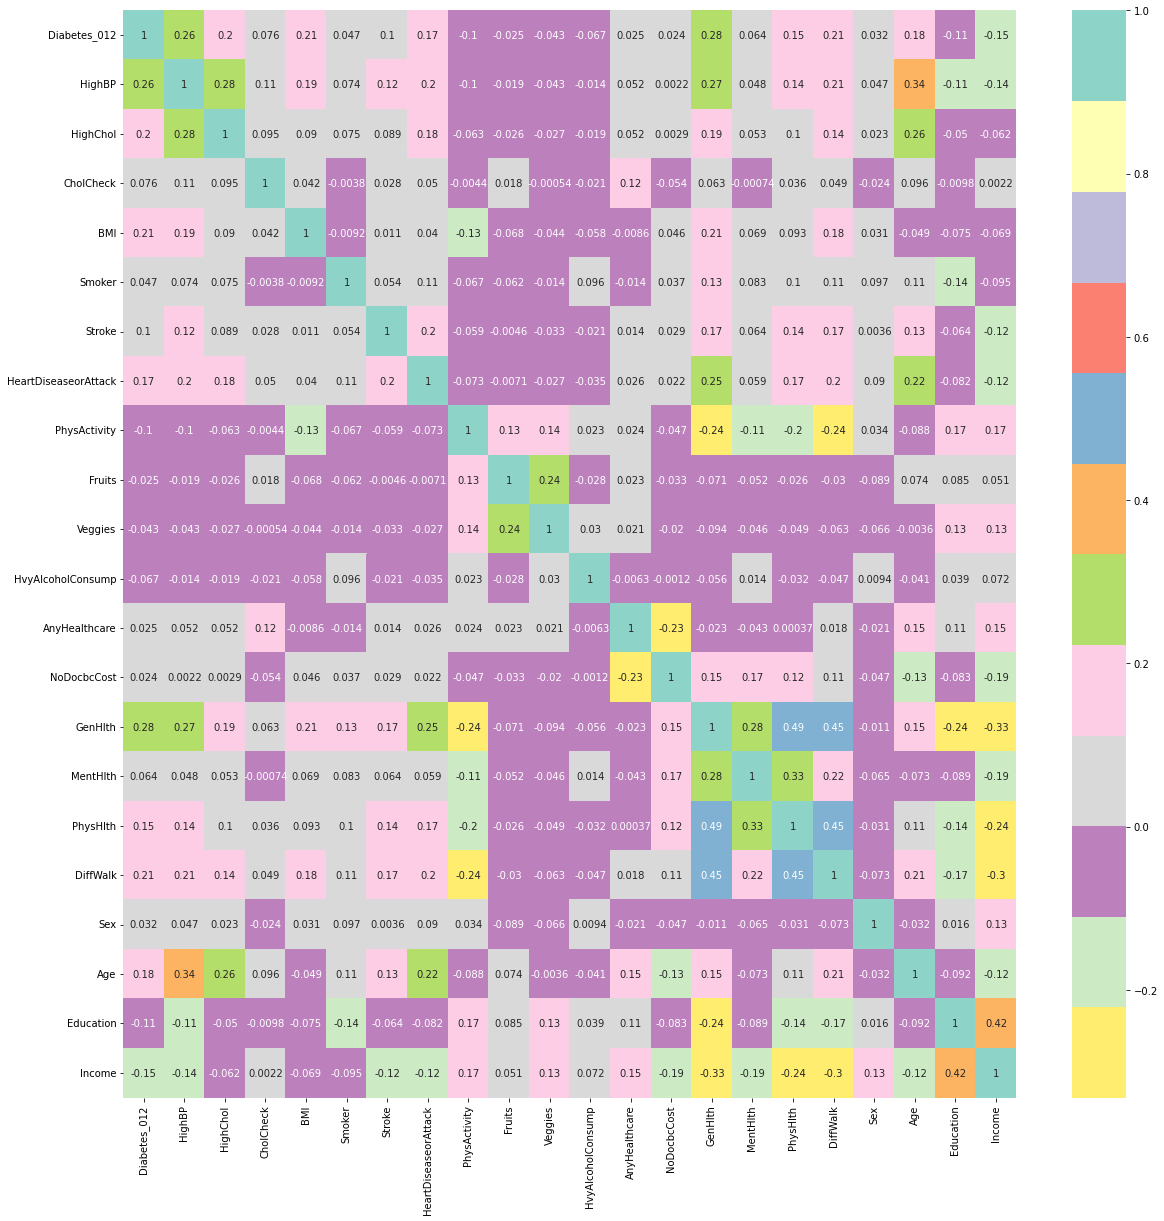

In [37]:
f = pl.figure( figsize =(20,20) )
sns.heatmap(cf_matrix,annot=True,cmap="Set3_r")
pl.show()

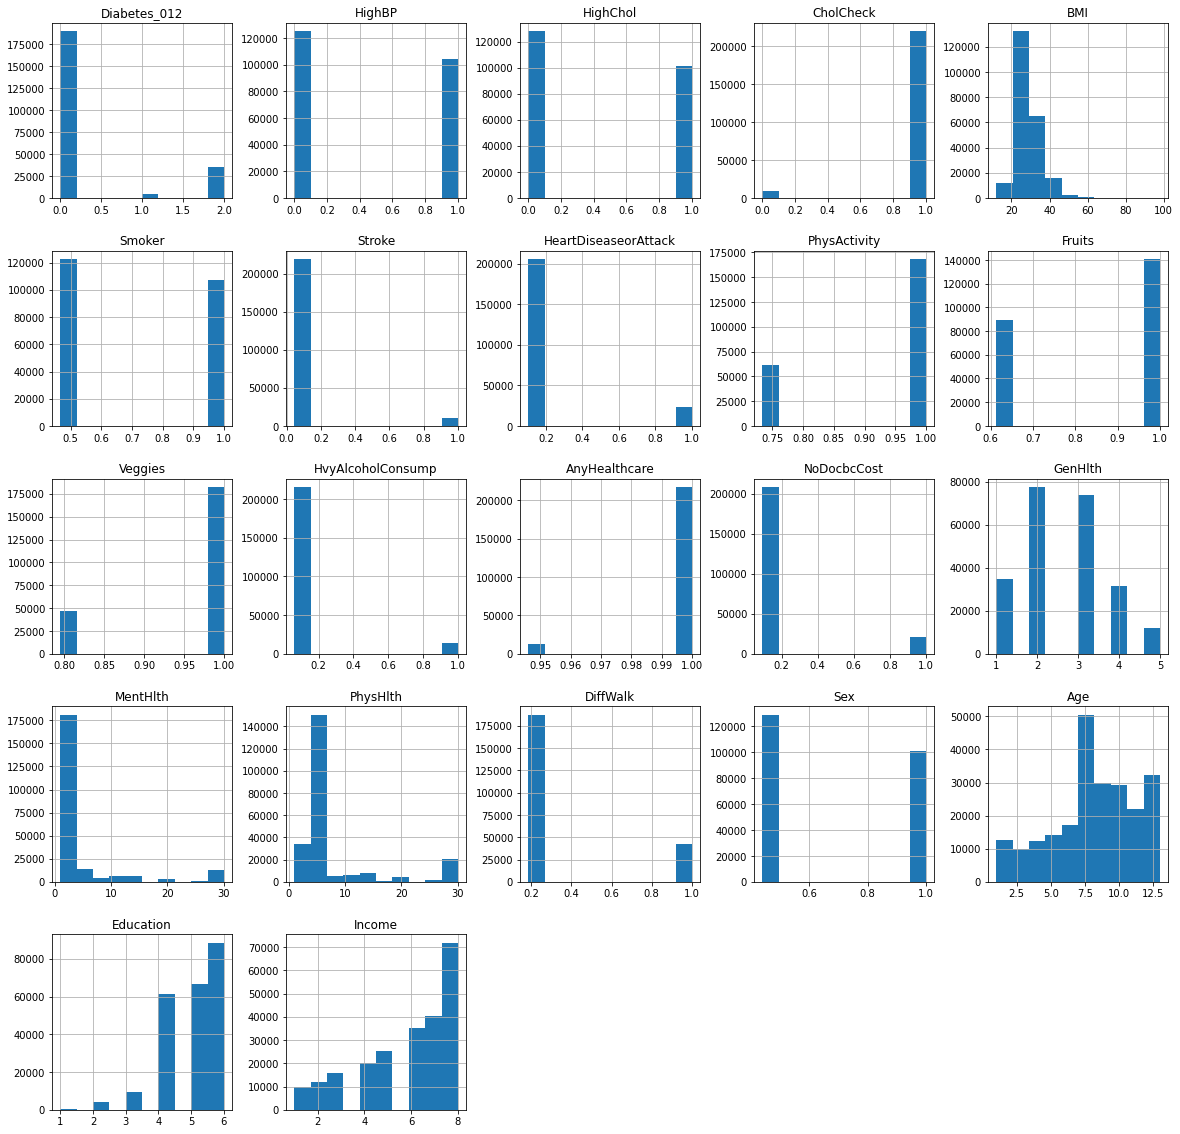

In [38]:
df.hist(figsize=(20,20))
pl.show()

In [39]:
##assigning independent and dependent variables
X = df.drop(columns = ['Diabetes_012'])
y = df['Diabetes_012']
y

0         0
1         0
2         0
3         0
4         0
         ..
253675    0
253676    2
253677    0
253678    0
253679    2
Name: Diabetes_012, Length: 229781, dtype: int64

[Text(0.5, 1.0, 'Data Imbalance Check')]

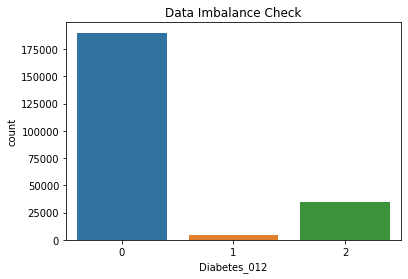

In [40]:
sns.countplot(df.Diabetes_012, ).set(title="Data Imbalance Check")

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(df)
pd.Series([variance_inflation_factor(X.values, i)
           for i in range(X.shape[1])], 
              index=X.columns)

const                   7488.915452
Diabetes_012               1.196079
HighBP                     1.315906
HighChol                   1.167207
CholCheck                  1.036036
BMI                        1.143793
Smoker                     1.076358
Stroke                     1.077836
HeartDiseaseorAttack       1.170137
PhysActivity               1.131693
Fruits                     1.098020
Veggies                    1.098243
HvyAlcoholConsump          1.027626
AnyHealthcare              1.109741
NoDocbcCost                1.133656
GenHlth                    1.698035
MentHlth                   1.198509
PhysHlth                   1.509555
DiffWalk                   1.498060
Sex                        1.074171
Age                        1.348208
Education                  1.271103
Income                     1.433415
dtype: float64

In [42]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1.000000,0.044756,0.103216,0.733355,0.612966,...,1.000000,0.09281,5,18.000000,15.000000,1.000000,0.439231,9,4,3
1,0,0,0,0,25,1.000000,0.044756,0.103216,1.000000,0.612966,...,0.946075,1.00000,3,3.505373,4.675178,0.185507,0.439231,7,6,1
2,0,1,1,1,28,0.465661,0.044756,0.103216,0.733355,1.000000,...,1.000000,1.00000,5,30.000000,30.000000,1.000000,0.439231,9,4,8
3,0,1,0,1,27,0.465661,0.044756,0.103216,1.000000,1.000000,...,1.000000,0.09281,2,3.505373,4.675178,0.185507,0.439231,11,3,6
4,0,1,1,1,24,0.465661,0.044756,0.103216,1.000000,1.000000,...,1.000000,0.09281,2,3.000000,4.675178,0.185507,0.439231,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0.465661,0.044756,0.103216,0.733355,1.000000,...,1.000000,0.09281,3,3.505373,5.000000,0.185507,1.000000,5,6,7
253676,2,1,1,1,18,0.465661,0.044756,0.103216,0.733355,0.612966,...,1.000000,0.09281,4,3.505373,4.675178,1.000000,0.439231,11,2,4
253677,0,0,0,1,28,0.465661,0.044756,0.103216,1.000000,1.000000,...,1.000000,0.09281,1,3.505373,4.675178,0.185507,0.439231,2,5,2
253678,0,1,0,1,23,0.465661,0.044756,0.103216,0.733355,1.000000,...,1.000000,0.09281,3,3.505373,4.675178,0.185507,1.000000,7,5,1


In [43]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('/content/diabeties.csv')

# Separate the features and target variable
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Apply SMOTE to oversample the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the shape of the resampled dataset
print('Original dataset shape:', X.shape, y.shape)
print('Resampled dataset shape:', X_resampled.shape, y_resampled.shape)


Original dataset shape: (253680, 21) (253680,)
Resampled dataset shape: (641109, 21) (641109,)


In [44]:
# Store the balanced dataset in a new dataframe
data_balanced = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
data_balanced.to_csv("diabetesnew.csv", index=False)

In [45]:
newdf = pd.read_csv("diabetesnew.csv")
newdf

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641104,0,1,1,25,0,0,0,1,0,1,...,0,2,2,0,0,0,10,5,6,2
641105,0,0,1,29,0,0,0,1,1,1,...,0,3,2,0,0,0,9,5,7,2
641106,1,1,1,33,0,0,0,0,1,0,...,0,4,0,10,1,0,10,4,4,2
641107,1,1,1,27,0,0,0,0,0,0,...,0,3,3,0,0,0,10,5,4,2


In [46]:
newdf.shape

(641109, 22)

[Text(0.5, 1.0, 'Data Imbalance Check')]

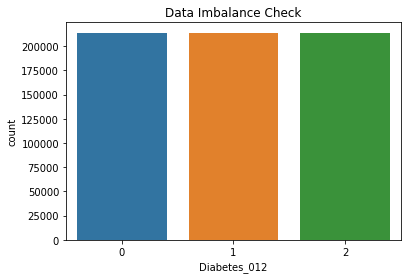

In [47]:
sns.countplot(newdf.Diabetes_012, ).set(title="Data Imbalance Check")

In [48]:
#PREPROCESSING DATA

In [49]:
#In machine learning, before creating a model, it is important to apply a pre-processing technique. 
#One of the numerous ways of preprocessing in by applying Feature scaling. 

In [50]:
 #FEATURE SCALING

In [51]:
#FS is important in preprocessing data before Model is created. There are 4 types of FS. Standard, Normalizer,
#Minmax scaler and Binalizer. FS is required for correct prediction and results. FS is important in Algorithms 
#like SVM and KNN. In tree based models like decision trees, Random Forest, etc, they do not really require scaling.
  #Also algorithms like LDA and Naive Bayes may not require FS because it won't really have an effect on them. In Scaling,
 #you don't really know the exact technique to use for your data until you try them all.

In [52]:
#FS- Standard Scaler - This has the formula X-Mean/std

In [53]:
scaler = StandardScaler()

In [54]:
scaler.fit(X)

StandardScaler()

In [55]:
SS =scaler.transform(X)

In [56]:
print(SS)

[[ 1.15368814  1.16525449  0.19692156 ...  0.31690008 -1.06559465
  -1.4744874 ]
 [-0.86678537 -0.85818163 -5.07816412 ... -0.33793279  0.96327159
  -2.44013754]
 [ 1.15368814  1.16525449  0.19692156 ...  0.31690008 -1.06559465
   0.93963796]
 ...
 [-0.86678537 -0.85818163  0.19692156 ... -1.97501498 -0.05116153
  -1.95731247]
 [ 1.15368814 -0.85818163  0.19692156 ... -0.33793279 -0.05116153
  -2.44013754]
 [ 1.15368814  1.16525449  0.19692156 ...  0.31690008  0.96327159
  -1.95731247]]


In [57]:
#Lets make use of the result gotten from the standard scaler

In [58]:
x_train,x_test,y_train,y_test=train_test_split(SS, y,test_size=0.2,random_state=7)

In [59]:
x_train.shape, y_train.shape

((202944, 21), (202944,))

In [60]:
x_test.shape, y_test.shape

((50736, 21), (50736,))

In [61]:
##LOGISTIC REGRESSION

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear', multi_class= 'ovr')
lr.fit(x_train,y_train)


LogisticRegression(multi_class='ovr', solver='liblinear')

In [63]:
#MAKING PREDICTIONS

In [64]:
x_test.shape

(50736, 21)

In [65]:
lr_pred = lr.predict(x_test)

In [66]:
lr_pred.shape

(50736,)

In [67]:
#MODEL EVALUATION

In [68]:
#Now that we have made predictions lets Evaluate our model

In [69]:
#Train and Test score

In [70]:
#Train and Test score of Logistic Regression
from sklearn.metrics import accuracy_score
print('Train score for Logistic Regression',lr.score(x_train, y_train)*100)
print('Test score for Logistic Regression',lr.score(x_test, y_test)*100)
print('Accuracy Test score for Logistic Regression',accuracy_score(y_test,lr_pred)*100)

Train score for Logistic Regression 84.68247398297068
Test score for Logistic Regression 84.52775149795018
Accuracy Test score for Logistic Regression 84.52775149795018


In [71]:
# Evaluate the performance of the model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91     42640
           1       0.00      0.00      0.00       902
           2       0.54      0.17      0.26      7194

    accuracy                           0.85     50736
   macro avg       0.47      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736



In [72]:
#CONFUSION MATRIX

In [73]:
#confusion matrix of logistic regression
c_mlr = confusion_matrix(y_test,lr_pred)
c_mlr

array([[41648,     0,   992],
       [  827,     0,    75],
       [ 5956,     0,  1238]])

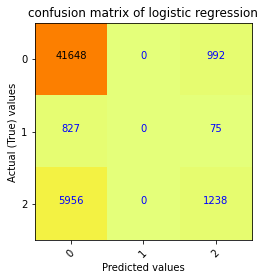

In [74]:
#from the result above, we cannot really tell which is TP,TN etc. 
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(c_mlr,interpolation = 'nearest', cmap = plt.cm.Wistia)
classNames = ['0','1','2']
plt.title('confusion matrix of logistic regression')
plt.ylabel('Actual (True) values')
plt.xlabel ('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks,classNames,rotation =45)
plt.yticks(tick_marks, classNames)
s= [['37224','0','726'],['884','0','44'],['6200','0','879']]
thresh = c_mlr.max() / 2.
for i in range(c_mlr.shape[0]):
    for j in range(c_mlr.shape[1]):
        plt.text(j, i, format(c_mlr[i, j], 'd'),
                 horizontalalignment="center",
                 color="black" if c_mlr[i, j] > thresh else "blue")

In [75]:
precision = precision_score(y_test, lr_pred, average='weighted', zero_division=0)

print("Precision score:", precision*100)

Precision score: 79.8878648018099


In [76]:
# Train the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)


DecisionTreeClassifier()

In [77]:
#MAKING PREDICTIONS

In [78]:
x_test.shape

(50736, 21)

In [79]:
dt_pred = dt.predict(x_test)

In [80]:
dt_pred.shape

(50736,)

In [81]:
#MODEL EVALUATION

In [82]:
#Now that we have made predictions lets Evaluate our model

In [83]:
#Train and Test score

In [84]:
#Train and Test score of Decision Tree
from sklearn.metrics import accuracy_score
print('Train score for Decision Tree',dt.score(x_train, y_train)*100)
print('Test score for Decision Tree',dt.score(x_test, y_test)*100)
print('Accuracy Test score for Decision Tree',accuracy_score(y_test,dt_pred)*100)

Train score for Decision Tree 99.32493692841375
Test score for Decision Tree 76.62606433301798
Accuracy Test score for Decision Tree 76.62606433301798


In [85]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     42640
           1       0.03      0.04      0.03       902
           2       0.29      0.31      0.30      7194

    accuracy                           0.77     50736
   macro avg       0.40      0.40      0.40     50736
weighted avg       0.78      0.77      0.77     50736



In [86]:
from sklearn.metrics import classification_report, confusion_matrix
#confusion matrix of Decision Tree
c_mdt = confusion_matrix(y_test,dt_pred)
c_mdt

array([[36620,   879,  5141],
       [  647,    37,   218],
       [ 4675,   299,  2220]])

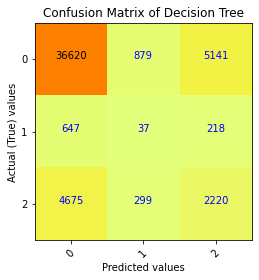

In [87]:
#from the result above, we cannot really tell which is TP,TN etc. 
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(c_mdt,interpolation = 'nearest', cmap = plt.cm.Wistia)
classNames = ['0','1','2']
plt.title('Confusion Matrix of Decision Tree')
plt.ylabel('Actual (True) values')
plt.xlabel ('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks,classNames,rotation =45)
plt.yticks(tick_marks, classNames)
s= [['37224','0','726'],['884','0','44'],['6200','0','879']]
thresh = c_mdt.max() / 2.
for i in range(c_mdt.shape[0]):
    for j in range(c_mdt.shape[1]):
        plt.text(j, i, format(c_mdt[i, j], 'd'),
                 horizontalalignment="center",
                 color="black" if c_mdt[i, j] > thresh else "blue")

In [88]:
precision = precision_score(y_test, dt_pred, average='weighted', zero_division=0)

print("Precision score:", precision*100)

Precision score: 77.5861859397566


In [89]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [90]:
rf_pred = rf.predict(x_test)

In [91]:
rf_pred.shape

(50736,)

In [92]:
#Train and Test score of Random Forest
from sklearn.metrics import accuracy_score
print('Train score for Random Forest',rf.score(x_train, y_train)*100)
print('Test score for Random Forest',rf.score(x_test, y_test)*100)
print('Accuracy Test score for Random Forest',accuracy_score(y_test,rf_pred)*100)

Train score for Random Forest 99.32050220750553
Test score for Random Forest 83.99164301482183
Accuracy Test score for Random Forest 83.99164301482183


In [93]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     42640
           1       0.05      0.00      0.00       902
           2       0.48      0.20      0.28      7194

    accuracy                           0.84     50736
   macro avg       0.46      0.39      0.40     50736
weighted avg       0.79      0.84      0.81     50736



In [94]:
#confusion matrix of Decision Tree
c_mrf = confusion_matrix(y_test,rf_pred)
c_mrf

array([[41205,    33,  1402],
       [  800,     2,   100],
       [ 5779,     8,  1407]])

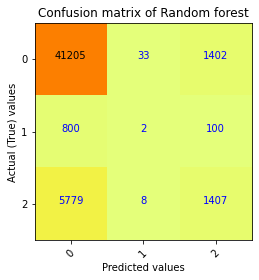

In [95]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(c_mrf,interpolation = 'nearest', cmap = plt.cm.Wistia)
classNames = ['0','1','2']
plt.title('Confusion matrix of Random forest')
plt.ylabel('Actual (True) values')
plt.xlabel ('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks,classNames,rotation =45)
plt.yticks(tick_marks, classNames)
s= [['32148','30','1718'],['741','2','104'],['4979','16','1167']]
thresh = c_mrf.max() / 2.
for i in range(c_mrf.shape[0]):
    for j in range(c_mrf.shape[1]):
        plt.text(j, i, format(c_mrf[i, j], 'd'),
                 horizontalalignment="center",
                  color="black" if c_mrf[i, j] > thresh else "blue")

In [96]:
precision = precision_score(y_test, rf_pred, average='weighted', zero_division=0)

print("Precision score:", precision*100)


Precision score: 79.4124918219434
